# **Logistic Regression Explained**

---

## **What is Logistic Regression?**

**Logistic Regression** is a supervised machine learning algorithm used for **classification problems**, especially for predicting outcomes that fall into two categories (**binary classification**). For example:

- Will a customer buy a product? (**Yes or No**)
- Does a patient have a disease? (**Positive or Negative**)
- Will an email be spam? (**Spam or Not Spam**)

---

## **Why Do We Need Logistic Regression?**

While **Linear Regression** predicts continuous values (like prices, temperatures, etc.), it's not suitable for classification tasks that require predictions such as "yes/no" or "true/false". Logistic regression helps by providing predictions of **probabilities** that clearly show the likelihood of each class, effectively solving classification tasks.

---

## **How Does Logistic Regression Work?**

Logistic regression uses a mathematical function called the **Sigmoid (logistic) function**. It converts continuous inputs into values between 0 and 1, representing probabilities:

### **Sigmoid Function:**

$$
P = \frac{1}{1 + e^{-(b_0 + b_1X_1 + b_2X_2 + \dots + b_nX_n)}}
$$

- **P** = probability of a specific class (between 0 and 1)
- **X** = independent variables/features
- **b₀, b₁...bₙ** = parameters (coefficients) learned by the model

This formula ensures the predicted output always falls between 0 and 1, easily translating into a decision threshold (usually 0.5) for classification.

---

## **Real Industry-Level Examples**

### **1. Banking & Finance: Loan Default Prediction**

- **Goal:** Predict if a customer will default on a loan.
- **Outcome:** Default (1), No Default (0)
- **Inputs:** Credit score, income, age, employment status.
- **Benefit:** Banks minimize risk by accurately identifying high-risk customers.

### **2. Healthcare: Disease Diagnosis**

- **Goal:** Predict if a patient has a disease.
- **Outcome:** Positive (1), Negative (0)
- **Inputs:** Symptoms, medical history, test results.
- **Benefit:** Doctors accurately diagnose patients early, saving lives.

### **3. Marketing: Email Spam Detection**

- **Goal:** Classify emails as spam or legitimate.
- **Outcome:** Spam (1), Not Spam (0)
- **Inputs:** Email content, sender information, keywords.
- **Benefit:** Improved user experience, protection from harmful emails.

---

## **When to Use Logistic Regression?**

- When your outcome variable is categorical (Yes/No, True/False).
- When you need probability estimates along with classifications.
- When interpretability is important—logistic regression clearly shows the influence of each input feature.

---

## **Advantages of Logistic Regression**

- **Simple & Efficient**: Easy to interpret and computationally efficient.
- **Probabilistic Interpretation**: Clearly states how confident the model is.
- **Widely Used**: Standard across industries due to its interpretability.


| Customer | Income (₹ in 1000s) | Purchased (0/1) |
| -------- | ------------------- | --------------- |
| A        | 30                  | 0               |
| B        | 35                  | 0               |
| C        | 40                  | 0               |
| D        | 45                  | 1               |
| E        | 50                  | 1               |
| F        | 60                  | 1               |


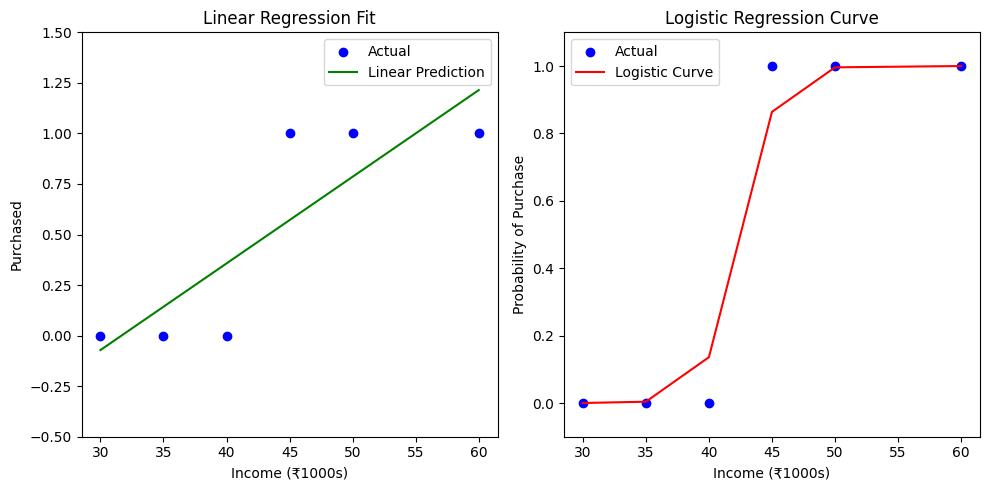

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression, LogisticRegression

# Dataset
X = np.array([[30], [35], [40], [45], [50], [60]])
y = np.array([0, 0, 0, 1, 1, 1])

# Linear Regression
lin_reg = LinearRegression()
lin_reg.fit(X, y)
y_lin_pred = lin_reg.predict(X)

# Logistic Regression
log_reg = LogisticRegression()
log_reg.fit(X, y)
y_log_pred = log_reg.predict_proba(X)[:, 1]

# Plotting
plt.figure(figsize=(10, 5))

# Linear
plt.subplot(1, 2, 1)
plt.scatter(X, y, color='blue', label='Actual')
plt.plot(X, y_lin_pred, color='green', label='Linear Prediction')
plt.title("Linear Regression Fit")
plt.xlabel("Income (₹1000s)")
plt.ylabel("Purchased")
plt.ylim(-0.5, 1.5)
plt.legend()

# Logistic
plt.subplot(1, 2, 2)
plt.scatter(X, y, color='blue', label='Actual')
plt.plot(X, y_log_pred, color='red', label='Logistic Curve')
plt.title("Logistic Regression Curve")
plt.xlabel("Income (₹1000s)")
plt.ylabel("Probability of Purchase")
plt.ylim(-0.1, 1.1)
plt.legend()

plt.tight_layout()
plt.show()


📈 What Do We See?
Linear Regression tries to fit a straight line between income and purchase, which is not ideal for binary outcomes (predicts <0 or >1).

Logistic Regression fits a sigmoid curve – perfect for binary classification, bounding the output between 0 and 1.


## 🧮 2. Sigmoid Function 📉

The **sigmoid function** maps any real number to a value between 0 and 1:

$$
\sigma(z) = \frac{1}{1 + e^{-z}}
$$

---

### ✅ Interpretation:

- When `z = 0`, sigmoid = 0.5 ⇒ **decision boundary**.
- When `z > 0`, sigmoid > 0.5 ⇒ class = 1 (likely to purchase).
- When `z < 0`, sigmoid < 0.5 ⇒ class = 0 (not likely to purchase).
- As `z → ∞`, sigmoid → 1; as `z → -∞`, sigmoid → 0.

---

### 🧠 Summary

| Regression Type     | Output Type         | Use Case                       | Visualization     |
| ------------------- | ------------------- | ------------------------------ | ----------------- |
| Linear Regression   | Continuous (ℝ)      | Predicting amount, price, etc. | Straight line     |
| Logistic Regression | Probability \[0, 1] | Binary classification (Yes/No) | S-curve (sigmoid) |


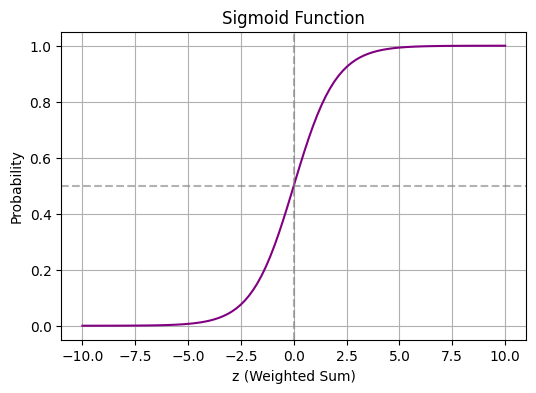

In [ ]:

# Sigmoid curve
z = np.linspace(-10, 10, 100)
sigmoid = 1 / (1 + np.exp(-z))

plt.figure(figsize=(6, 4))
plt.plot(z, sigmoid, color='purple')
plt.title("Sigmoid Function")
plt.xlabel("z (Weighted Sum)")
plt.ylabel("Probability")
plt.grid(True)
plt.axhline(0.5, linestyle='--', color='gray', alpha=0.6)
plt.axvline(0, linestyle='--', color='gray', alpha=0.6)
plt.show()


## **Industry Example: Predicting Email Categories**

Imagine an **email classifier** sorting emails into **3 classes**:

- **Work Email**
- **Personal Email**
- **Spam Email**

We predict the class and then check against the actual email type.

---

## **Confusion Matrix (Simple Explanation)**

A confusion matrix helps measure prediction accuracy. It shows how many predictions were correct or incorrect for each category.

|                     | Predicted Work | Predicted Personal | Predicted Spam |
| ------------------- | -------------- | ------------------ | -------------- |
| **Actual Work**     | **TP**         | FP                 | FP             |
| **Actual Personal** | FN             | **TP**             | FP             |
| **Actual Spam**     | FN             | FN                 | **TP**         |

_(Each class gets its own confusion matrix or sub-matrix when evaluated individually.)_

---

## **Understanding TP, FP, TN, FN clearly (with Work Emails):**

### **Taking "Work Emails" as positive class:**

- **True Positive (TP)**:
  Predicted email as **Work** and actually is **Work**.

  - ✅ **Correct prediction**.

- **False Positive (FP)**:
  Predicted email as **Work**, but actually is **Personal or Spam**.

  - ❌ **Incorrect prediction** (false alarm).

- **False Negative (FN)**:
  Predicted email as **Personal or Spam**, but actually is **Work**.

  - ❌ **Missed prediction** (missed detection).

- **True Negative (TN)**:
  Predicted email as **Personal or Spam**, and it actually is **Personal or Spam**.

  - ✅ **Correctly identified as not work**.

Similarly, you calculate these for the other two categories (Personal, Spam).

---

## **Example: Simplified Email Prediction Results**

Suppose we have 10 emails:

| Email No. | Actual Type | Predicted Type |
| --------- | ----------- | -------------- |
| 1         | Work ✅     | Work ✅        |
| 2         | Personal ✅ | Spam ❌        |
| 3         | Spam ✅     | Spam ✅        |
| 4         | Work ✅     | Personal ❌    |
| 5         | Personal ✅ | Personal ✅    |
| 6         | Spam ✅     | Spam ✅        |
| 7         | Work ✅     | Work ✅        |
| 8         | Spam ✅     | Work ❌        |
| 9         | Personal ✅ | Personal ✅    |
| 10        | Work ✅     | Work ✅        |

---

## **Calculate Confusion Matrix for "Work" Emails**

| Metric | Count | Explanation                                       |
| ------ | ----- | ------------------------------------------------- |
| **TP** | **3** | Emails 1,7,10 correctly predicted as Work         |
| **FP** | **1** | Email 8 predicted as Work, but actually Spam      |
| **FN** | **1** | Email 4 predicted as Personal, but actually Work  |
| **TN** | **5** | Emails 2,3,5,6,9 correctly identified as not Work |

Confusion matrix for **"Work" Emails**:

|                     | Predicted Work | Predicted Not Work |
| ------------------- | -------------- | ------------------ |
| **Actual Work**     | TP = **3**     | FN = **1**         |
| **Actual Not Work** | FP = **1**     | TN = **5**         |

---

## **Classification Report (Explained clearly)**

A classification report gives you Precision, Recall, and F1-Score for each class:

### **Precision**

- Of all predicted as "Work", how many were correct?

$$
Precision = \frac{TP}{TP + FP} = \frac{3}{3 + 1} = 0.75
$$

### **Recall**

- Of all actual "Work" emails, how many did we catch?

$$
Recall = \frac{TP}{TP + FN} = \frac{3}{3 + 1} = 0.75
$$

### **F1-Score**

- Balances precision and recall into one score:

$$
F1 = 2 \times \frac{Precision \times Recall}{Precision + Recall} = 2 \times \frac{0.75 \times 0.75}{0.75 + 0.75} = 0.75
$$

---

## **Similarly, for Personal and Spam emails:**

You perform the same calculation:

- **Personal emails**:

  - Precision and Recall calculated using TP, FP, FN for Personal.

- **Spam emails**:

  - Precision and Recall calculated similarly.

---

## **Why is this important?**

- **TP:** You accurately find important emails (good classification).
- **FP:** You incorrectly mark non-work as work (false alarms).
- **FN:** You miss important emails (missed opportunities).
- **TN:** Correctly identify irrelevant emails (efficiency).

---

## **Simple Summary**

| Term  | Simple Meaning    | Email Example                 |
| ----- | ----------------- | ----------------------------- |
| TP ✅ | Correct detection | Actual Work, predicted Work   |
| FP ❌ | False alarm       | Predicted Work, actually Spam |
| FN ❌ | Missed detection  | Predicted Spam, actually Work |
| TN ✅ | Correctly ignored | Predicted Spam, actually Spam |


# **ROC Curve and AUC Explained **

---

## **What is ROC-AUC?**

- **ROC** stands for **Receiver Operating Characteristic**.
- It's a graphical representation showing how good a classification model is at separating classes.
- **AUC** (Area Under the Curve) is a single number summarizing the entire ROC curve, ranging from **0 to 1**:

  - **1** = Perfect classification
  - **0.5** = Random guessing
  - **0** = Always wrong

---

## **Simple Meaning of ROC Components**

ROC curve plots two values at different thresholds:

- **True Positive Rate (TPR)**:
  How many actual positives does the model catch?

  $$
  TPR = \frac{TP}{TP + FN}
  $$

- **False Positive Rate (FPR)**:
  How many negatives does the model wrongly predict as positive?

  $$
  FPR = \frac{FP}{FP + TN}
  $$

We calculate these values for different probability thresholds to plot the ROC curve.

---

## **Continuing the Email Example**

Let's say we classify emails as **Work** or **Not Work**:

- **Positive class**: Work email
- **Negative class**: Personal/Spam email

Imagine we have model predictions as **probabilities** of being a "Work" email:

| Email No. | Actual Type | Probability (Work) |
| --------- | ----------- | ------------------ |
| 1         | Work ✅     | 0.95               |
| 2         | Personal ❌ | 0.60               |
| 3         | Spam ❌     | 0.10               |
| 4         | Work ✅     | 0.45               |
| 5         | Personal ❌ | 0.20               |

---

## **How to Construct an ROC Curve? (Step-by-step)**

### Step 1: Choose different thresholds

Example thresholds: **0.8, 0.5, 0.3**

### Step 2: Calculate TPR & FPR at each threshold

| Threshold | Predictions   | TP  | FP  | FN  | TN  | TPR (TP/TP+FN) | FPR (FP/FP+TN) |
| --------- | ------------- | --- | --- | --- | --- | -------------- | -------------- |
| **≥0.8**  | Email #1      | 1   | 0   | 1   | 3   | 0.5 (1/2)      | 0.0 (0/3)      |
| **≥0.5**  | Emails #1,2   | 1   | 1   | 1   | 2   | 0.5 (1/2)      | 0.33 (1/3)     |
| **≥0.3**  | Emails #1,2,4 | 2   | 1   | 0   | 2   | 1.0 (2/2)      | 0.33 (1/3)     |

### Step 3: Plotting the ROC Curve

- **Y-axis (vertical)**: TPR
- **X-axis (horizontal)**: FPR

We plot these points and connect them to form the curve.

---

## **How to interpret the ROC curve?**

- A **perfect model** hugs the top-left corner (TPR=1, FPR=0).
- A **random model** is a diagonal line (TPR ≈ FPR).

---

## **Understanding AUC (Area Under Curve)**

- **High AUC**: Good model, easily separates Work from Non-Work emails.
- **Low AUC (near 0.5)**: Model performs no better than random guessing.
- **AUC = 1.0**: Ideal model (perfect predictions).

---

## **Industry Example**

If an email filtering system has a high ROC-AUC (e.g., **0.95**), it clearly separates important (work) from irrelevant emails, greatly improving user productivity.

- **High ROC-AUC (0.9+)** → reliable model, great predictions.
- **Moderate ROC-AUC (0.7-0.9)** → usable, but room to improve.
- **Low ROC-AUC (≤0.6)** → weak, unreliable predictions.

---

## **Summary Table **

| ROC-AUC Score | Model Performance | Meaning (Email Example)       |
| ------------- | ----------------- | ----------------------------- |
| **0.9 – 1.0** | Excellent ✅      | Very accurate classification  |
| **0.8 – 0.9** | Good 👍           | Reliable predictions          |
| **0.7 – 0.8** | Fair 🙂           | Reasonably useful predictions |
| **0.5 – 0.7** | Poor ⚠️           | Barely better than random     |
| **\~0.5**     | Useless ❌        | Random guessing               |

---

## **Conclusion (Why use ROC-AUC)?**

ROC-AUC clearly summarizes your model’s ability to separate classes across all decision thresholds. It helps quickly assess model quality, enabling data scientists to build reliable, effective classification systems like email spam filters, loan default predictors, or medical diagnosis tools.


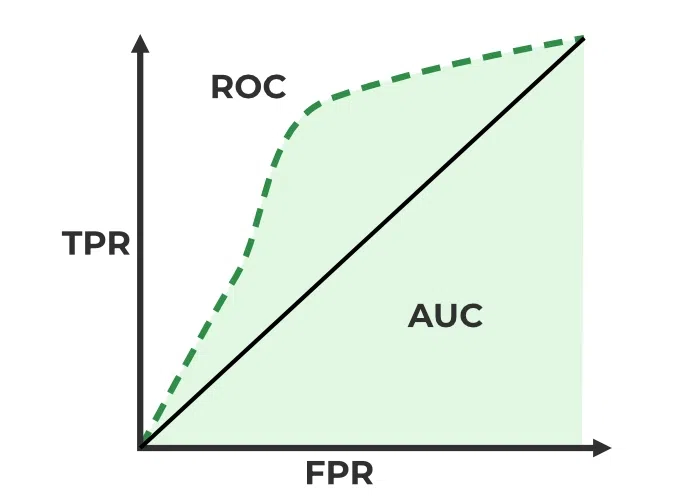


## 🧠 **What is Cohen’s Kappa?**

Cohen’s Kappa (κ) measures the **agreement between two raters or models**, **adjusted for the agreement that could happen by chance**.

---

### 🤔 Why Not Just Use Accuracy?

Because **accuracy can be misleading**, especially in **imbalanced datasets**.

> Imagine two doctors diagnosing patients. If 90% of patients are healthy, and both doctors just say “Healthy” all the time, they’ll agree 90% of the time — but that’s not useful. They didn’t actually diagnose anything.

So Cohen’s Kappa helps us **see if the agreement is truly meaningful**, beyond random chance.

---

## 🧮 **Cohen’s Kappa Formula**

$$
\kappa = \frac{p_o - p_e}{1 - p_e}
$$

Where:

- $p_o$ = **Observed Accuracy** (how often they actually agreed)
- $p_e$ = **Expected Accuracy** (how often they would agree **by chance**)

---

## 🔢 Example: Simple 2-Class Case

Imagine a **medical diagnosis scenario**:

|                   | **Doctor B: No** | **Doctor B: Yes** | Row Totals |
| ----------------- | ---------------- | ----------------- | ---------- |
| **Doctor A: No**  | 50               | 10                | 60         |
| **Doctor A: Yes** | 5                | 35                | 40         |
| **Col Totals**    | 55               | 45                | 100        |

### Step 1: Observed Agreement ($p_o$)

$$
p_o = \frac{50 + 35}{100} = \frac{85}{100} = 0.85
$$

(They agreed on 50 "No" + 35 "Yes" = 85 total)

---

### Step 2: Expected Agreement by Chance ($p_e$)

Expected for “No”:

$$
\frac{(60 \times 55)}{100^2} = \frac{3300}{10000} = 0.33
$$

Expected for “Yes”:

$$
\frac{(40 \times 45)}{100^2} = \frac{1800}{10000} = 0.18
$$

$$
p_e = 0.33 + 0.18 = 0.51
$$

---

### Step 3: Calculate Kappa

$$
\kappa = \frac{0.85 - 0.51}{1 - 0.51} = \frac{0.34}{0.49} ≈ 0.693
$$

---

## ✅ Interpretation:

| Kappa Score | Interpretation               |
| ----------- | ---------------------------- |
| < 0         | Worse than random            |
| 0 – 0.20    | Slight agreement             |
| 0.21 – 0.40 | Fair agreement               |
| 0.41 – 0.60 | Moderate agreement           |
| 0.61 – 0.80 | **Substantial agreement** ✅ |
| 0.81 – 1.00 | Almost perfect agreement     |

So, **κ ≈ 0.69** → **Substantial agreement** between Doctor A and B.

---

## 🏥 Real Industry Use Case

**Use Case**: Two radiologists reviewing X-rays.

- Doctor A and B both look at 100 scans.
- You want to know if their diagnosis agreement is **real** (not just because most scans are “normal”).

> Cohen’s Kappa tells you whether they are **really in sync** — not just agreeing by chance.

---

## 🧠 Key Takeaways

- **Cohen’s Kappa corrects for chance agreement.**
- Use when you compare **two classifiers or two humans**.
- Especially helpful in **medical**, **legal**, or **recruitment** scenarios.


## 🔚 Summary Comparison Table

| Metric                | Best For                                 | Drawback                                  |
| --------------------- | ---------------------------------------- | ----------------------------------------- |
| Accuracy              | Balanced classes, general overview       | Misleading in imbalanced data             |
| Precision             | False positives are costly (e.g. spam)   | Ignores false negatives                   |
| Recall                | False negatives are costly (e.g. cancer) | Ignores false positives                   |
| F1 Score              | Balanced Precision & Recall              | Hard to interpret directly                |
| ROC & AUC             | Ranking performance                      | Less intuitive for business users         |
| Confusion Matrix      | Intuitive, raw numbers                   | Can’t compare across models easily        |
| Classification Report | Compact view of metrics                  | Can be verbose                            |
| Cohen’s Kappa         | Human-like evaluation                    | Requires understanding expected agreement |


---

## **Limitations**

* **Linear boundaries only**: Can't model highly complex, non-linear relationships well.
* **Sensitive to outliers**: Outliers significantly affect model accuracy.
* **Binary Classification (primarily)**: Though it can handle multi-class problems with extensions (OvR, multinomial), it's mainly used for binary classification.

---

## **Practical Considerations**

- **Feature Scaling**: Recommended (but not strictly required) for improved accuracy.
- **Class Balance**: Ensuring balanced datasets helps model performance significantly.

---

## **Summary in a nutshell**

| **Point**             | **Logistic Regression**                       |
| --------------------- | --------------------------------------------- |
| **What is it?**       | Classification algorithm using probabilities  |
| **Function Used**     | Sigmoid (Logistic) function                   |
| **Output Type**       | Probability (0–1)                             |
| **Typical Use-Cases** | Healthcare, finance, marketing                |
| **Strengths**         | Easy, interpretable, efficient                |
| **Limitations**       | Sensitive to outliers, linear boundaries only |

---

## **Conclusion**

Logistic Regression is a foundational classification method because of its simplicity, interpretability, and effectiveness. Understanding logistic regression equips students and future data scientists with an essential tool for addressing real-world classification challenges.
